In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("d:/datasets/商务数据分析/8/data/GoodsOrder.csv",encoding="ansi")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43285 entries, 0 to 43284
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      43285 non-null  int64 
 1   Goods   43285 non-null  object
dtypes: int64(1), object(1)
memory usage: 676.5+ KB


In [7]:
data.describe(include="all")

,id,Goods
count,43285.000000,43285
unique,NaN,168
top,NaN,全脂牛奶
freq,NaN,2513
mean,4907.985723,NaN
std,2843.314189,NaN
min,1.000000,NaN
25%,2455.000000,NaN
50%,4826.000000,NaN
75%,7381.000000,NaN


In [9]:
data.groupby("id").count()

,Goods
id,
1,4
2,3
3,1
4,4
5,4
...,...
9831,17
9832,1
9833,10


In [12]:
data.groupby("Goods").count()

,id
Goods,
一般清洁剂,189
一般肉类,254
一般饮料,256
人造黄油,576
仁果类水果,744
...,...
马铃薯产品,28
鱼,29
鸡,422


In [31]:
data.describe()

,id
count,43285.000000
mean,4907.985723
std,2843.314189
min,1.000000
25%,2455.000000
50%,4826.000000
75%,7381.000000
max,9835.000000


In [13]:
data.Goods.value_counts()[:10]

全脂牛奶     2513
其他蔬菜     1903
面包卷      1809
苏打水      1715
酸奶       1372
瓶装水      1087
根茎类蔬菜    1072
热带水果     1032
购物袋       969
香肠        924
Name: Goods, dtype: int64

In [15]:
data_groupby=data.groupby("Goods").count()

In [16]:
data_order=data_groupby["id"].sort_values(ascending=False)

In [17]:
data_order_10=data_order.head(10)

In [18]:
data_order_10

Goods
全脂牛奶     2513
其他蔬菜     1903
面包卷      1809
苏打水      1715
酸奶       1372
瓶装水      1087
根茎类蔬菜    1072
热带水果     1032
购物袋       969
香肠        924
Name: id, dtype: int64

In [19]:
data_order_10_pd=pd.DataFrame(data_order_10)

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

array([<AxesSubplot:ylabel='id'>], dtype=object)

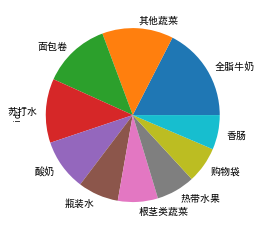

In [21]:
data_order_10_pd.plot(kind="pie",subplots=True,legend=False)

<AxesSubplot:ylabel='Goods'>

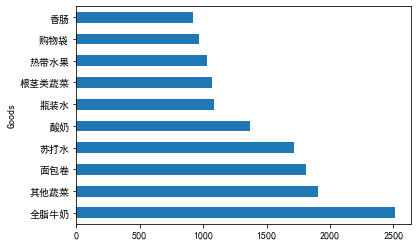

In [22]:
data_order_10_pd["id"].plot(kind="barh")

In [23]:
data_order_10_pd["占比"]=data_order_10_pd["id"]/data.describe().loc["count"].values

In [24]:
data_order_10_pd["占比%"]=data_order_10_pd["占比"].apply(lambda x: str(x*100)[:5]+"%" )

In [25]:
data_order_10_pd

,id,占比,占比%
Goods,,,
全脂牛奶,2513,0.058057,5.805%
其他蔬菜,1903,0.043964,4.396%
面包卷,1809,0.041793,4.179%
苏打水,1715,0.039621,3.962%
酸奶,1372,0.031697,3.169%
瓶装水,1087,0.025113,2.511%
根茎类蔬菜,1072,0.024766,2.476%
热带水果,1032,0.023842,2.384%
购物袋,969,0.022387,2.238%


In [26]:
data2=pd.read_csv("d:/datasets/商务数据分析/8/data/GoodsTypes.csv",encoding="ansi")

In [28]:
data2

,Goods,Types
0,白饭,熟食
1,白酒,酒精饮料
2,白兰地,酒精饮料
3,白面包,西点
4,半成品面包,西点
...,...,...
164,有机香肠,肉类
165,鱼,肉类
166,浴室清洁剂,百货
167,长面包,西点


In [30]:
data3=pd.merge(data,data2,left_on="Goods",right_on="Goods")
data3

,id,Goods,Types
0,1,柑橘类水果,果蔬
1,12,柑橘类水果,果蔬
2,40,柑橘类水果,果蔬
3,73,柑橘类水果,果蔬
4,77,柑橘类水果,果蔬
...,...,...,...
43280,5781,厨房用具,百货
43281,8707,厨房用具,百货
43282,9105,厨房用具,百货
43283,5642,防腐用品,百货


In [33]:
data3["Types"].value_counts()

非酒精饮料    7594
西点       7192
果蔬       7146
米粮调料     5185
百货       5141
肉类       4870
酒精饮料     2287
食品类      1870
零食       1459
熟食        541
Name: Types, dtype: int64

In [34]:
labels_=data3["Types"].value_counts().index

([<matplotlib.patches.Wedge at 0x21c405dc370>,
 [Text(0.9797011717550068, 0.60223385330108, '非酒精饮料'),
  Text(-0.061526957944022305, 1.148352921991386, '西点'),
  Text(-1.0218291309799117, 0.5276032856994339, '果蔬'),
  Text(-1.0508260622688848, -0.46718795666890856, '米粮调料'),
  Text(-0.45100273813614433, -1.05787358894799, '百货'),
  Text(0.3656731391379868, -1.0903133289623543, '肉类'),
  Text(0.8586723385670029, -0.7649717739759258, '酒精饮料'),
  Text(1.047200772606618, -0.47525839482549176, '食品类'),
  Text(1.1304983797061943, -0.21088720559026183, '零食'),
  Text(1.1491135970508446, -0.045143560702155194, '熟食')])

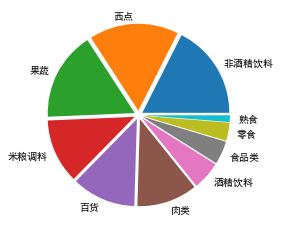

In [36]:
plt.pie(data3["Types"].value_counts(),labels=labels_,explode=[0.05]*10)

In [41]:
data4=data3[data3["Types"]=="非酒精饮料"]["Goods"].value_counts()

In [42]:
data4

全脂牛奶        2513
苏打水         1715
瓶装水         1087
水果/蔬菜汁       711
咖啡           571
超高温杀菌的牛奶     329
其他饮料         279
一般饮料         256
速溶咖啡          73
茶             38
可可饮料          22
Name: Goods, dtype: int64

([<matplotlib.patches.Wedge at 0x21c3f4f3eb0>,
 [Text(0.5724058302297562, 0.9742954200441382, '全脂牛奶'),
  Text(-1.0603704374143925, 0.3905310940982934, '苏打水'),
  Text(-0.7821645256462754, -0.8155480702083338, '瓶装水'),
  Text(-0.023372072934394035, -1.1297582689260341, '水果/蔬菜汁'),
  Text(0.5513158370437278, -0.9863827085998487, '咖啡'),
  Text(0.8723700532620197, -0.7182412478907216, '超高温杀菌的牛奶'),
  Text(1.023677322573809, -0.47852349915977804, '其他饮料'),
  Text(1.1037542045221433, -0.24212941993836834, '一般饮料'),
  Text(1.1264000943181511, -0.09012673033046627, '速溶咖啡'),
  Text(1.1293498799652144, -0.038325560955534514, '茶'),
  Text(1.1299531994267091, -0.010284313557257918, '可可饮料')])

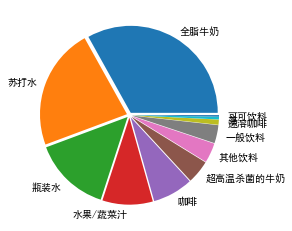

In [44]:
plt.pie(data4.values,explode=[0.03]*11,labels=data4.index)

In [45]:
data

,id,Goods
0,1,柑橘类水果
1,1,人造黄油
2,1,即食汤
3,1,半成品面包
4,2,咖啡
...,...,...
43280,9835,鸡
43281,9835,其他蔬菜
43282,9835,购物袋
43283,9835,热带水果


In [47]:
orders=[]
ids=data.groupby("id").count().index

In [48]:
ids

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            9826, 9827, 9828, 9829, 9830, 9831, 9832, 9833, 9834, 9835],
           dtype='int64', name='id', length=9830)

In [50]:
list(data[data["id"]==1].Goods.values)

['柑橘类水果', '人造黄油', '即食汤', '半成品面包']

In [51]:
data[data["id"]==1].Goods.values

array(['柑橘类水果', '人造黄油', '即食汤', '半成品面包'], dtype=object)

In [58]:
list(data[data["id"]==211].Goods.values)

['瓶装水', '黄油', '卫生用品', '卸妆液', '苏打水', '酸奶']

In [59]:
for id in ids:
    order=list(data[data["id"]==id].Goods.values)
    orders.append(order)

In [60]:
orders

[['柑橘类水果', '人造黄油', '即食汤', '半成品面包'],
 ['咖啡', '热带水果', '酸奶'],
 ['全脂牛奶'],
 ['奶油乳酪', '肉泥', '仁果类水果', '酸奶'],
 ['炼乳', '长面包', '其他蔬菜', '全脂牛奶'],
 ['腐蚀性清洁剂', '黄油', '白饭', '全脂牛奶', '酸奶'],
 ['面包卷'],
 ['瓶装啤酒', '开胃酒', '其他蔬菜', '面包卷', '超高温杀菌的牛奶'],
 ['盆栽'],
 ['谷物', '全脂牛奶'],
 ['瓶装水', '巧克力', '其他蔬菜', '热带水果', '白面包'],
 ['瓶装水', '黄油', '柑橘类水果', '凝乳', '碗碟', '面粉', '热带水果', '全脂牛奶', '酸奶'],
 ['牛肉'],
 ['冷冻热狗肠', '面包卷', '苏打水'],
 ['鸡', '热带水果'],
 ['黄油', '水果/蔬菜汁', '报纸', '糖'],
 ['水果/蔬菜汁'],
 ['包装水果/蔬菜'],
 ['巧克力'],
 ['特制门锁'],
 ['其他蔬菜'],
 ['酪', '糕点'],
 ['全脂牛奶'],
 ['奶油乳酪', '一般清洁剂', '报纸', '融化奶酪', '热带水果'],
 ['浴室清洁剂',
  '糖果',
  '面粉',
  '冷冻甜点',
  '其他蔬菜',
  '面包卷',
  '根茎类蔬菜',
  '咸点心',
  '甜食',
  '热带水果',
  '威化饼'],
 ['瓶装水', '罐装啤酒'],
 ['酸奶'],
 ['巧克力', '面包卷', '香肠', '苏打水'],
 ['其他蔬菜'],
 ['黑面包', '罐装啤酒', '水果/蔬菜汁', '报纸', '购物袋', '苏打水'],
 ['一般饮料', '瓶装水', '特制门锁', '酸奶'],
 ['瓶装水', '汉堡肉', '卫生用品', '餐巾', '其他蔬菜', '面包卷', '香辛料'],
 ['一般饮料', '其他蔬菜', '根茎类蔬菜', '糖', '全脂牛奶'],
 ['腐蚀性清洁剂', '甜味剂', '莓果', '其他蔬菜', '猪肉', '苏打水', '酸奶油', '全脂牛奶'],
 ['牛肉', '一般清洁剂', '葡萄'],
 [

In [61]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [62]:
te = TransactionEncoder()
#进行 one-hot 编码
te_ary = te.fit(orders).transform(orders)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [63]:
df

,一般清洁剂,一般肉类,一般饮料,人造黄油,仁果类水果,保鲜膜/袋,全脂牛奶,其他蔬菜,其他饮料,冰淇淋,...,餐巾,香肠,香草,香辛料,马桶清洁剂,马铃薯产品,鱼,鸡,黄油,黑面包
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,False,False,False,False,False,False,True,False,False,False,...,True,True,False,False,False,False,False,True,True,False
9826,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9827,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
9828,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
#频繁项集
freq=apriori(df,min_support=0.03, use_colnames=True)

In [69]:
freq

,support,itemsets
0,0.058596,(人造黄油)
1,0.075687,(仁果类水果)
2,0.255646,(全脂牛奶)
3,0.193591,(其他蔬菜)
4,0.059003,(冷冻热狗肠)
...,...,...
59,0.043438,"(其他蔬菜, 酸奶)"
60,0.042625,"(其他蔬菜, 面包卷)"
61,0.038352,"(苏打水, 面包卷)"
62,0.034385,"(酸奶, 面包卷)"


In [70]:
from mlxtend.frequent_patterns import association_rules
#计算关联规则
result = association_rules(freq, metric="confidence", min_threshold=0.3)

In [71]:
result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(仁果类水果),(全脂牛奶),0.075687,0.255646,0.030112,0.397849,1.556252,0.010763,1.236159
1,(其他蔬菜),(全脂牛奶),0.193591,0.255646,0.074873,0.386758,1.512865,0.025382,1.213801
2,(本地蛋类),(全脂牛奶),0.063479,0.255646,0.030010,0.472756,1.849262,0.013782,1.411784
3,(柑橘类水果),(全脂牛奶),0.082808,0.255646,0.030519,0.368550,1.441644,0.009349,1.178802
4,(根茎类蔬菜),(全脂牛奶),0.109054,0.255646,0.048932,0.448694,1.755138,0.021053,1.350165
5,(热带水果),(全脂牛奶),0.104985,0.255646,0.042319,0.403101,1.576793,0.015481,1.247035
6,(瓶装水),(全脂牛奶),0.110580,0.255646,0.034385,0.310948,1.216321,0.006115,1.080257
7,(糕点),(全脂牛奶),0.089013,0.255646,0.033266,0.373714,1.461843,0.010510,1.188521
8,(酸奶),(全脂牛奶),0.139573,0.255646,0.056053,0.401603,1.570936,0.020372,1.243914
9,(酸奶油),(全脂牛奶),0.071719,0.255646,0.032248,0.449645,1.758860,0.013913,1.352499
